## Regresión Logistica
Caso de estudio para establecer un modelo que permita calcular la probabilidad de obtener matrícula de honor alfinal del bachillerato en  funcion de la nota que se ha obtenido en matematicas.
*0* representa que no se tiene la matricula, *1* si tiene la matricula.

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ==============================================================================
import warnings

warnings.filterwarnings('ignore')

In [8]:
# Datos
# ==============================================================================
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                      0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                      0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                      0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                      1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                      1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                      1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                      0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                      0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                      0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                      0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

matematicas = np.array([
    41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
    51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
    63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
    63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
    50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
    57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
    72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
    57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
    56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
    58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
    53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
    63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
    53, 42, 60, 52, 38, 57, 58, 65])

datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})
datos.matricula.value_counts().sort_index()

0    151
1     49
Name: matricula, dtype: int64

In [9]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X = datos[['matematicas']]
y = datos['matricula']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 20


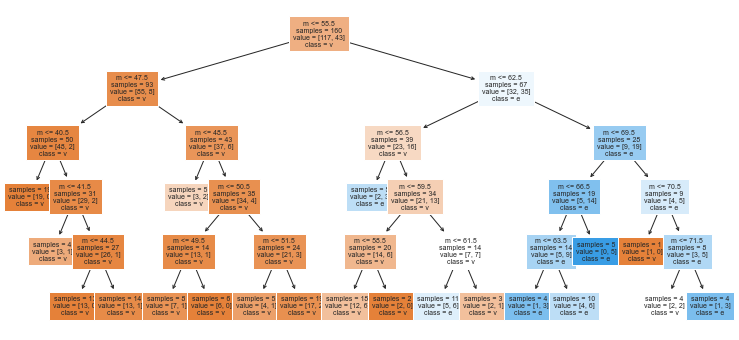

In [10]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = 'matematicas',
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [11]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[29,  5],
       [ 3,  3]], dtype=int64)

In [12]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 80.0 %
